<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/let's_do_a_new_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries
import pandas as pd
import PIL
import pylab
import numpy as math
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Let's install some more
!pip install git+git://github.com/geopandas/geopandas.git
!pip install mapclassify --quiet

In [167]:
#...and import then
import geopandas as gpd
import mapclassify.classifiers as classifiers
from mapclassify import __version__ as mc_version

In [ ]:
#let's create our food availibility data frame
x = pd.read_csv('/content/df_final_use.csv')
fa_df = x[['Country', 'Year', 'Food Availibility per capita (kg/cap/year)']]
#And a countries data frame (list of all countries in the world)
cdf = pd.read_csv('/content/countries_world.csv')
fa_df

In [169]:
new = fa_df.merge(cdf, on = 'Country', how = 'outer')
new.sort_values(by = 'Country', inplace = True)
new['Year'] = new['Year'].astype('Int64')

In [170]:
new.set_index(['Country', 'Year'], inplace = True)
unstacked = new.unstack()
unstacked.sort_values(by = 'Country', inplace = True)

In [171]:
#uploading the world map.
world_map = gpd.read_file(r'/content/World_Map.shp')

In [ ]:
#Using a for loop, iterate through the names of the countries in our food availibility data set.
#See, using an if statement, which match with the World data set data and which don't. 
for index, row in unstacked.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

In [173]:
#replace the names of the countries that don't match.
world_map.replace('Central African Republic', 'CAR', inplace = True)
world_map.replace('Dominican Republic', 'DomRep', inplace = True)
world_map.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world_map.replace('Republic of Moldova', 'Moldova', inplace = True)
world_map.replace("Korea, Democratic People's Republic of", 'North Korea', inplace = True)
world_map.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world_map.replace('Viet Nam', 'Vietnam', inplace = True)
world_map.replace("Cote d'Ivoire", "Céte d'Ivoire", inplace = True)
world_map.replace('Brunei Darussalam', 'Brunei', inplace = True)
world_map.replace('Democratic Republic of the Congo', 'Congo, Democratic Republic of the', inplace = True)
world_map.replace("Congo", 'Congo, Republic of the', inplace = True)
world_map.replace('Timor-Leste', 'East Timor (Timor-Leste)', inplace = True)
world_map.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world_map.replace("Korea, Democratic People's Republic of", 'Korea, North', inplace = True)
world_map.replace('Korea, Republic of', 'Korea, South', inplace = True)
world_map.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world_map.replace('The former Yugoslav Republic of Macedonia', 'Macedonia', inplace = True)
world_map.replace('Burma', 'Myanmar (Burma)', inplace = True)
world_map.replace('Sudan', 'South Sudan', inplace = True)
world_map.replace('Syrian Arab Republic', 'Syria', inplace = True)
world_map.replace('Bahamas', 'The Bahamas', inplace = True)
world_map.replace('Gambia', 'The Gambia', inplace = True)
world_map.replace('United States', 'United States of America', inplace = True)
world_map.replace('Holy See (Vatican City)', 'Vatican City (Holy See)', inplace = True)

In [ ]:
#check again.
for index, row in unstacked.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

In [175]:
#The remaining countries are then those that are twice in our unstacked data frame, that is:
#those that were not matching when merging our data frames with the countries in the world data frame. So:
unstacked.drop(['Central African Republic',
                'DRCongo',
                'Congo',
                "Cote d'Ivoire",
                'Dominican Republic',
                'Gambia',
                'Korea, North',
                'Kosovo',
                'Sudan'],
               inplace = True)

In [176]:
#Final check, everything should be alright now!
for index, row in unstacked.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

In [ ]:
#Merge the world data with our food availibility data
merged = world_map.join(unstacked, on = 'NAME', how = 'right')
merged = merged.fillna(10000)
merged

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:624: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:624: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:624: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

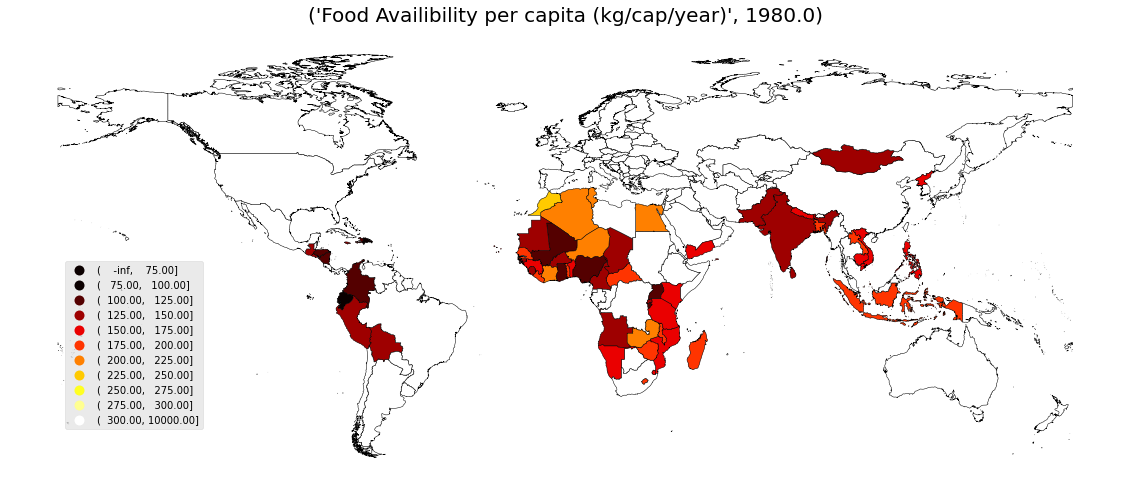

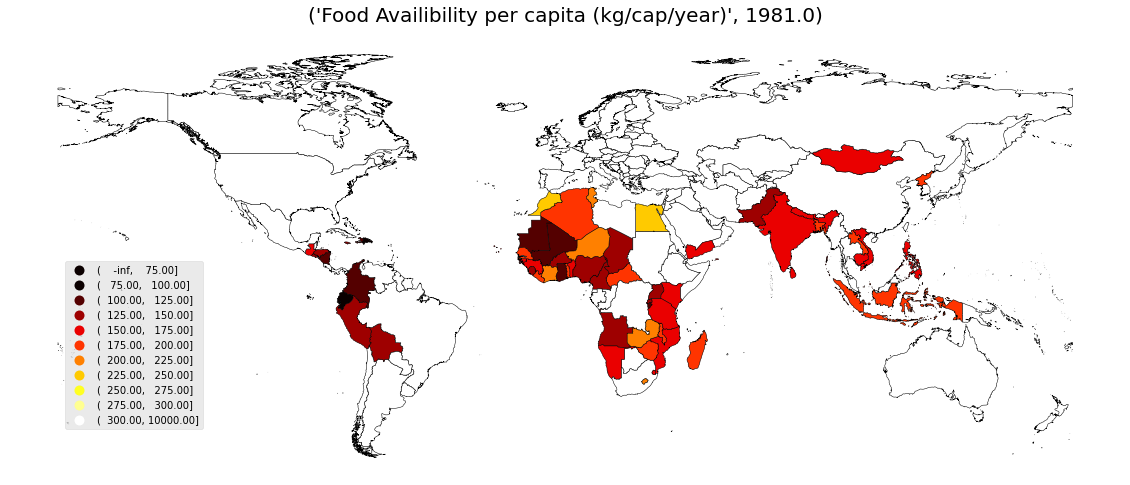

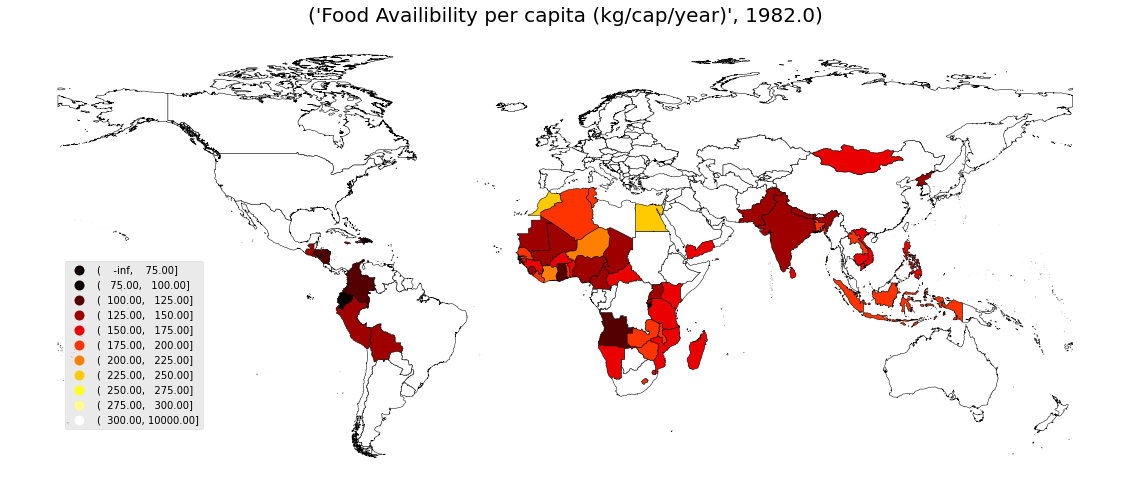

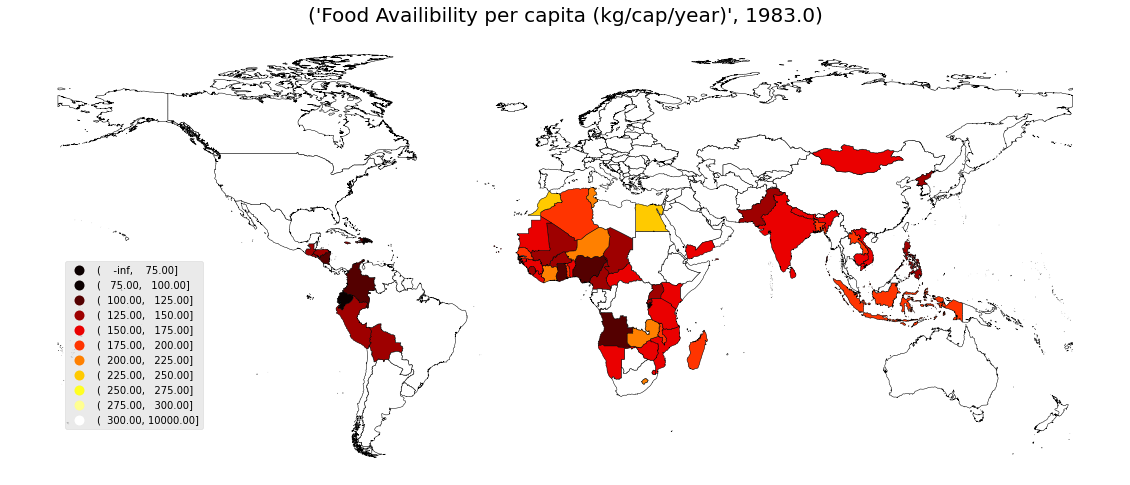

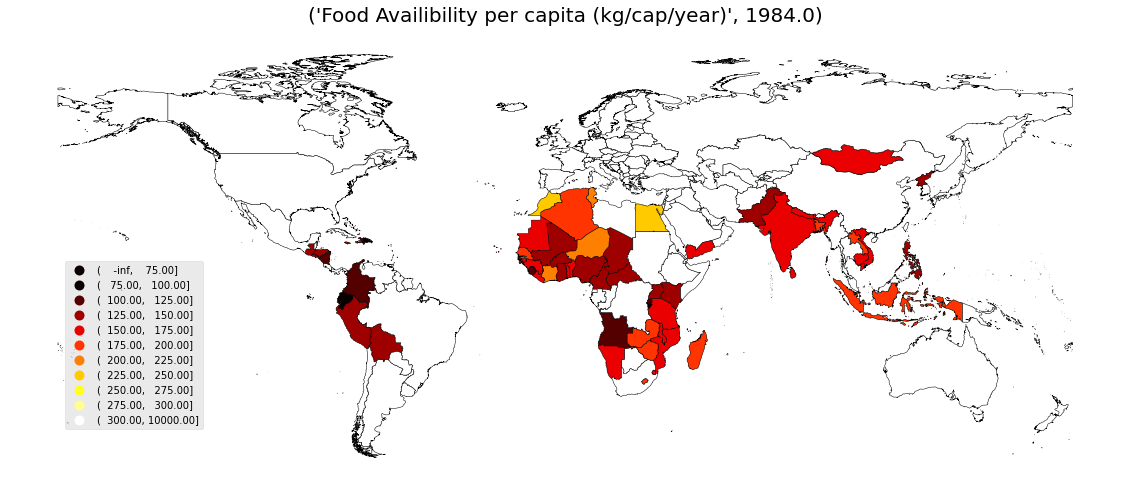

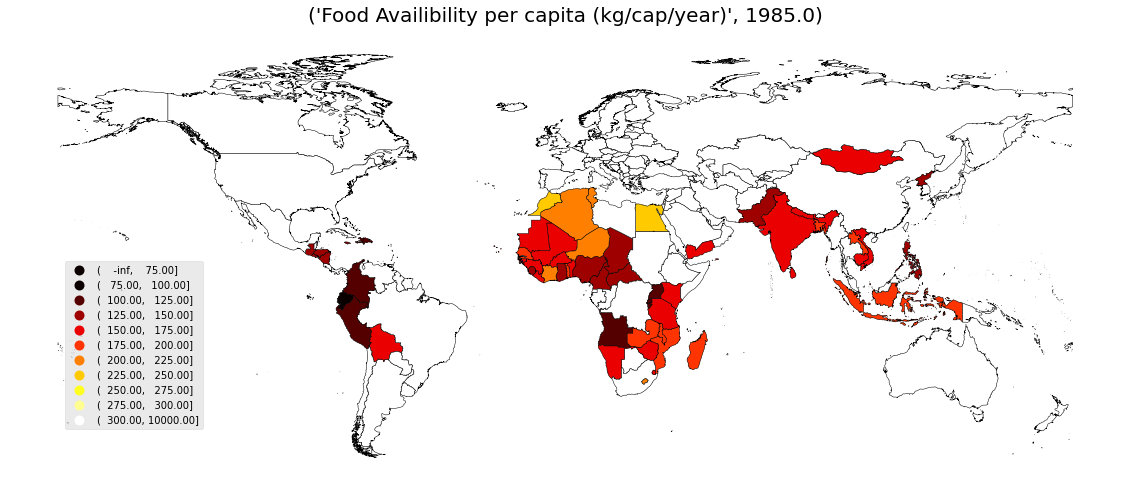

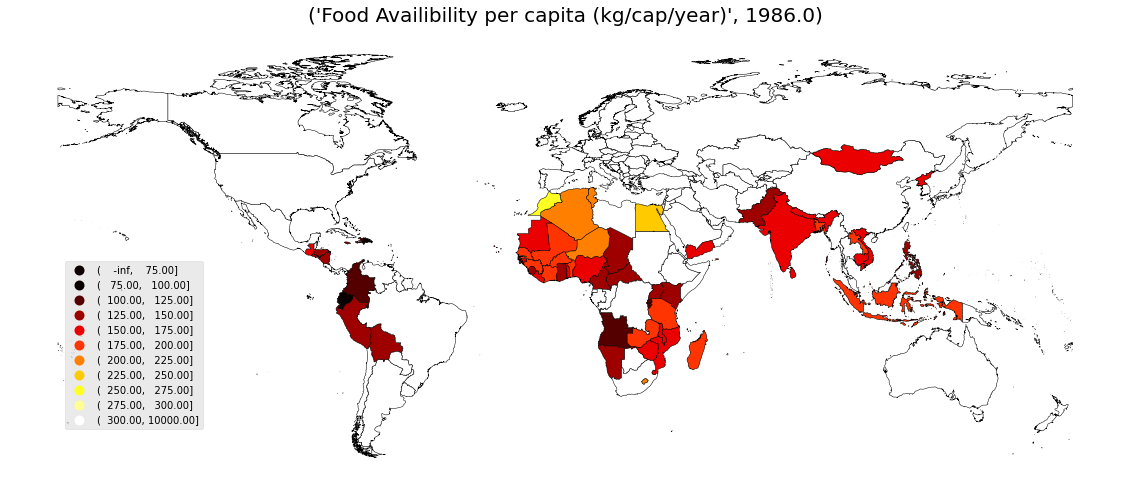

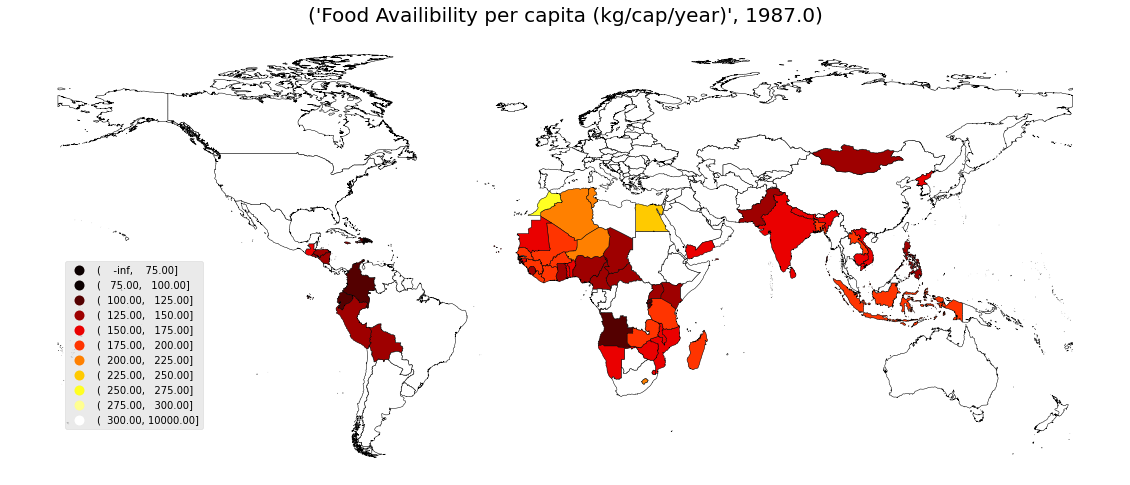

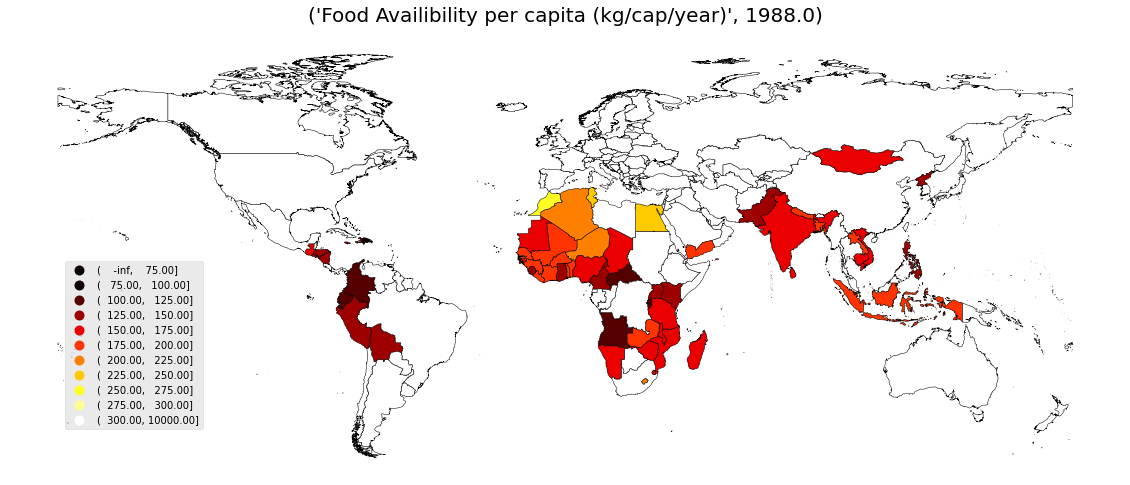

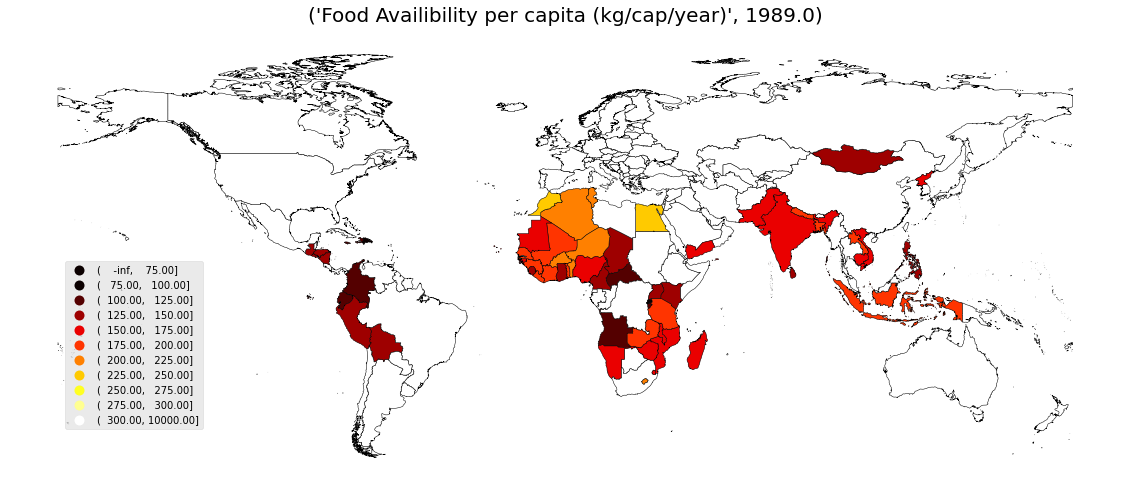

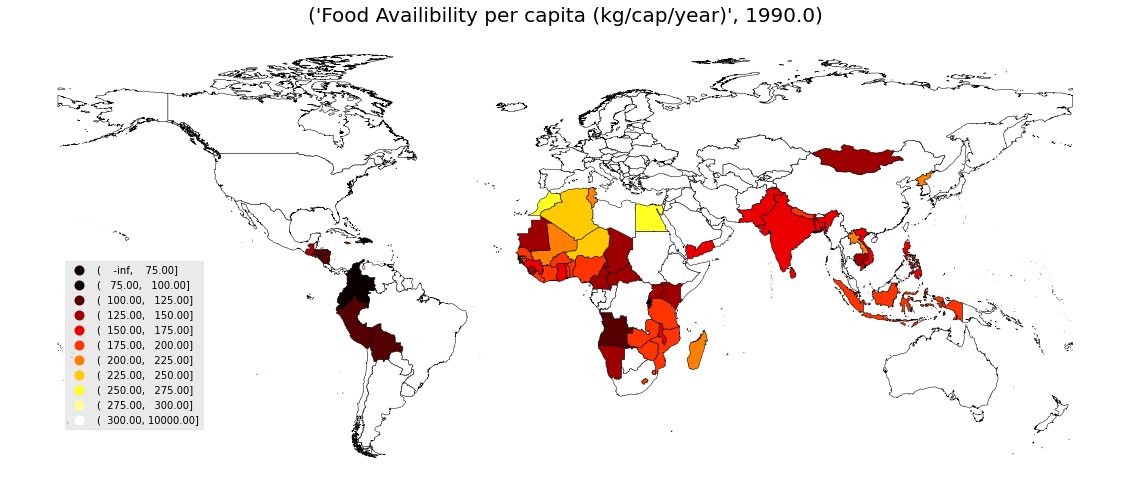

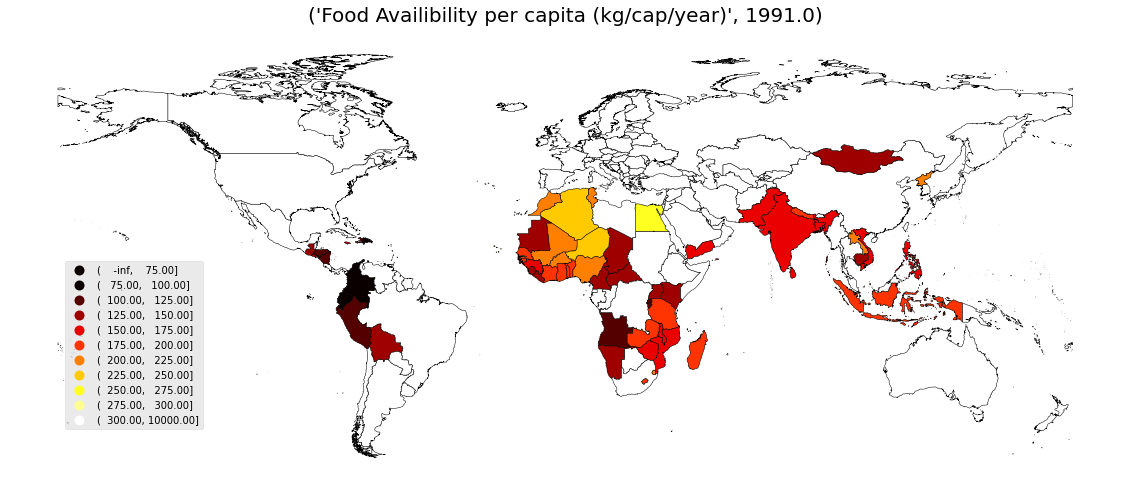

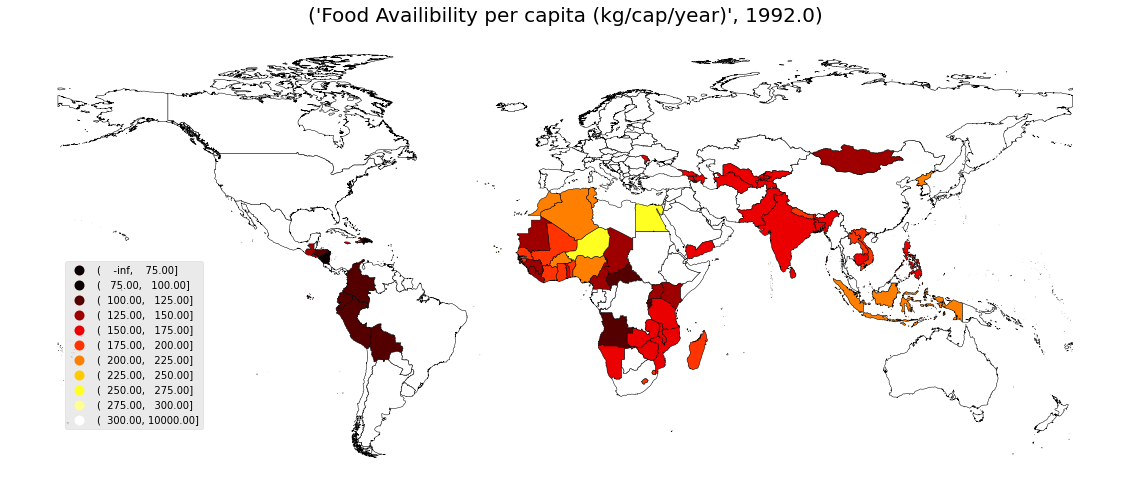

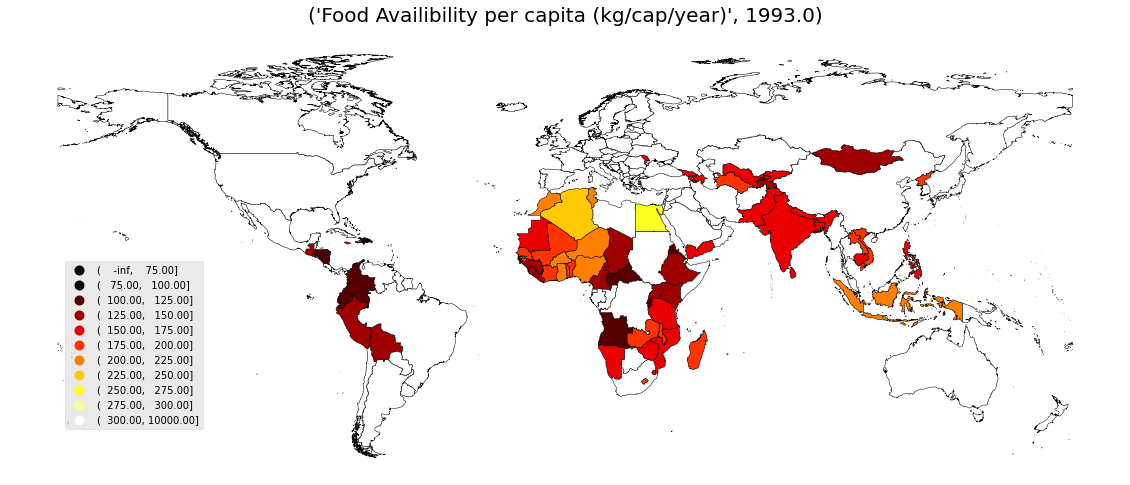

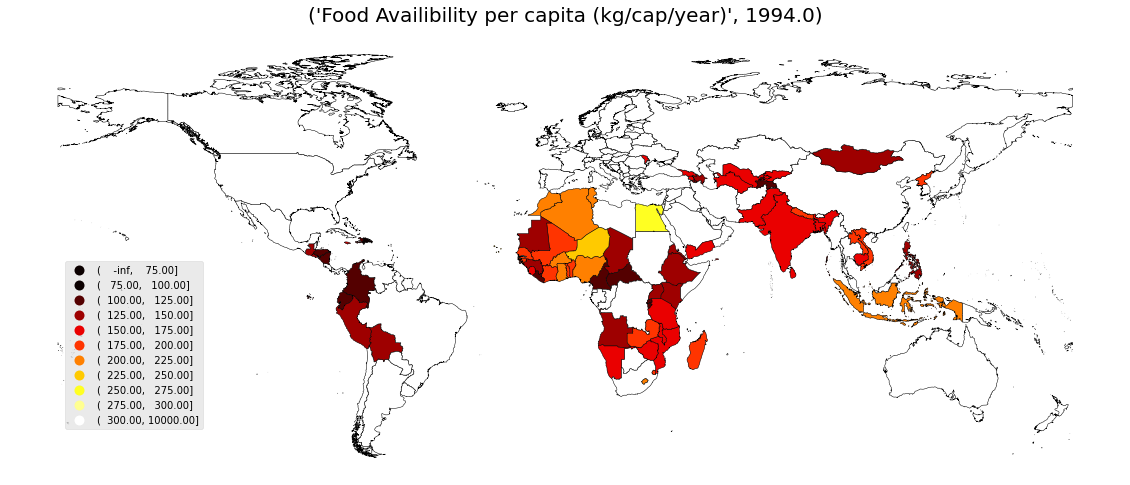

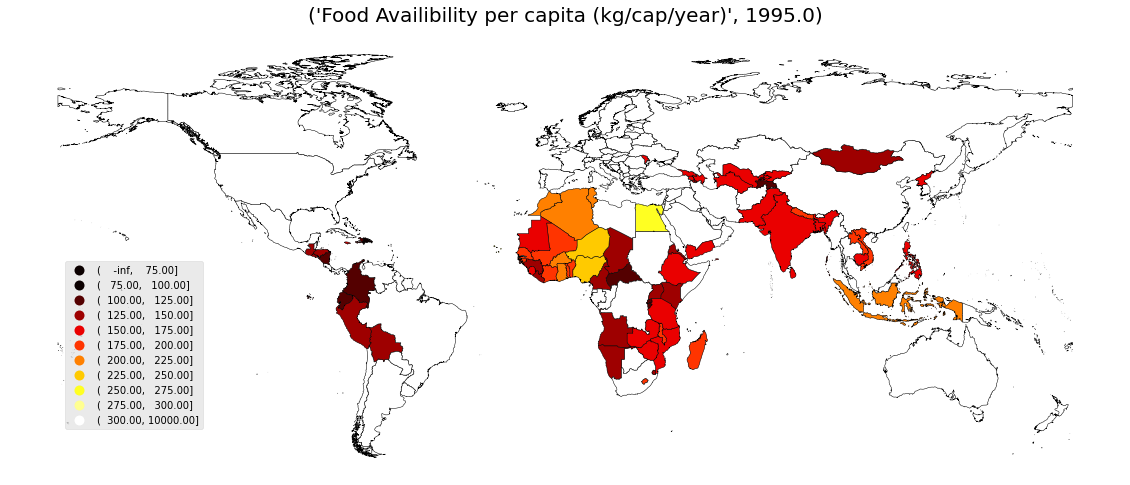

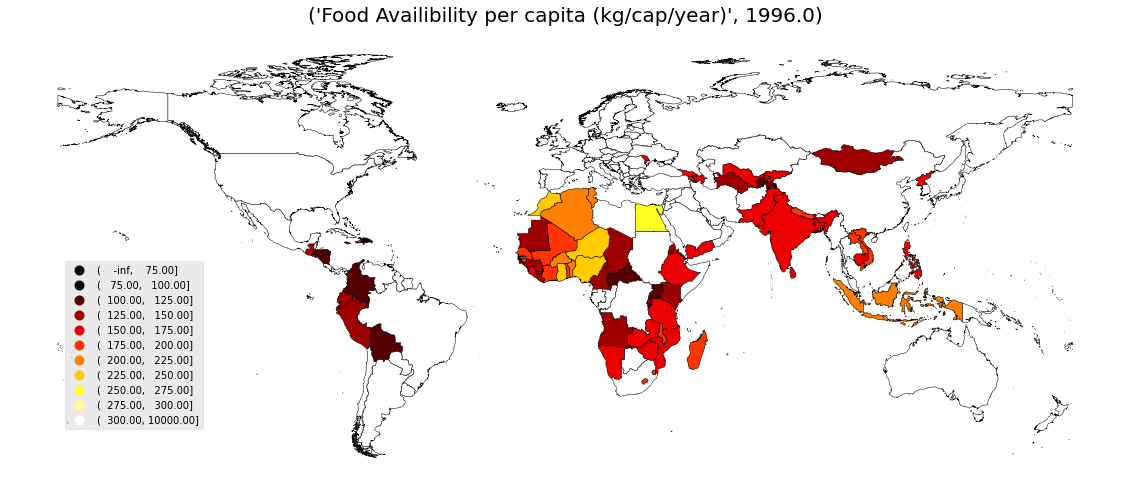

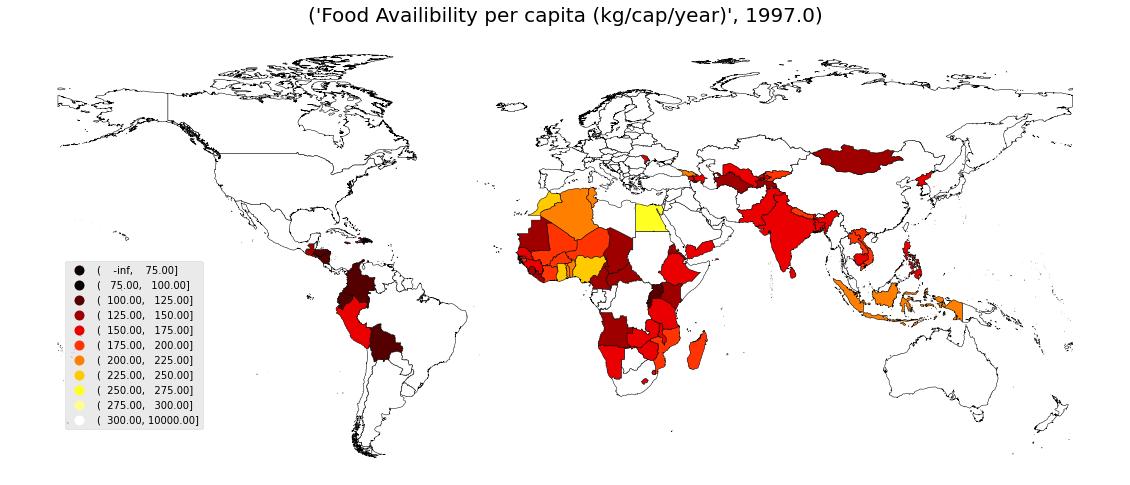

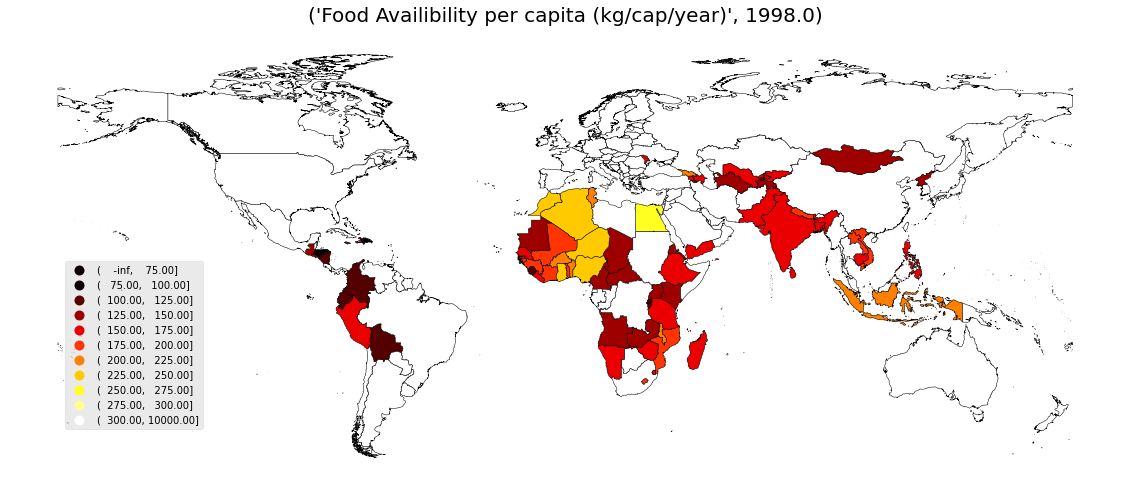

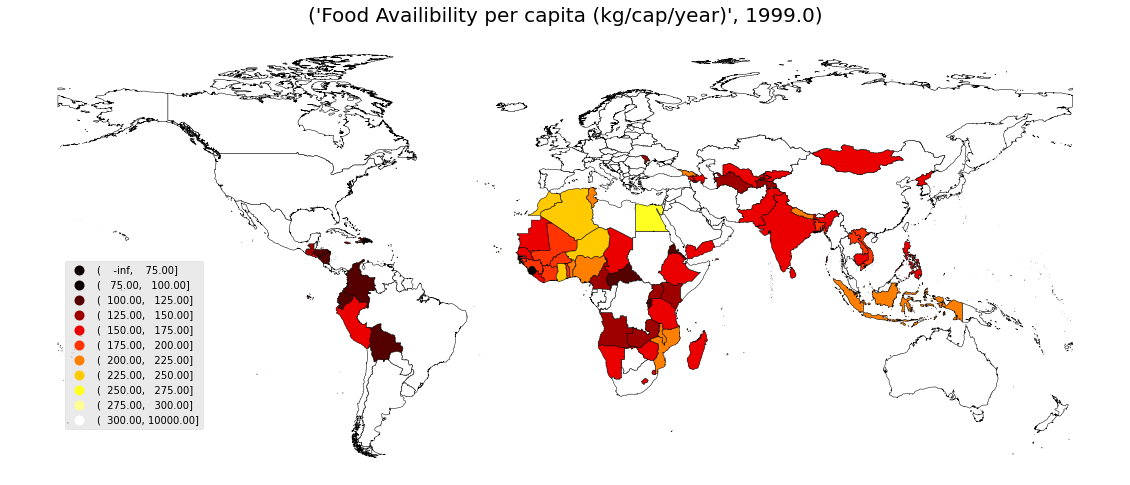

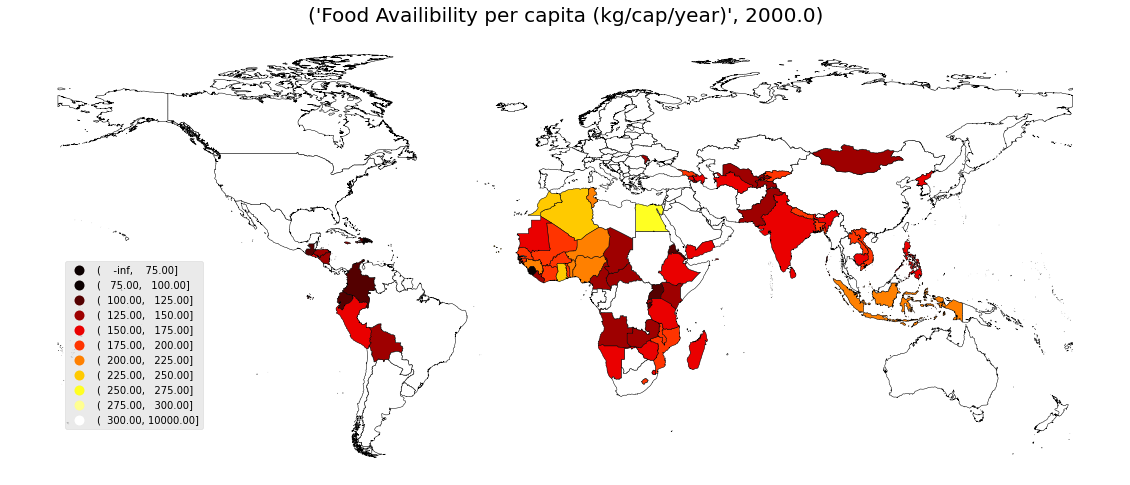

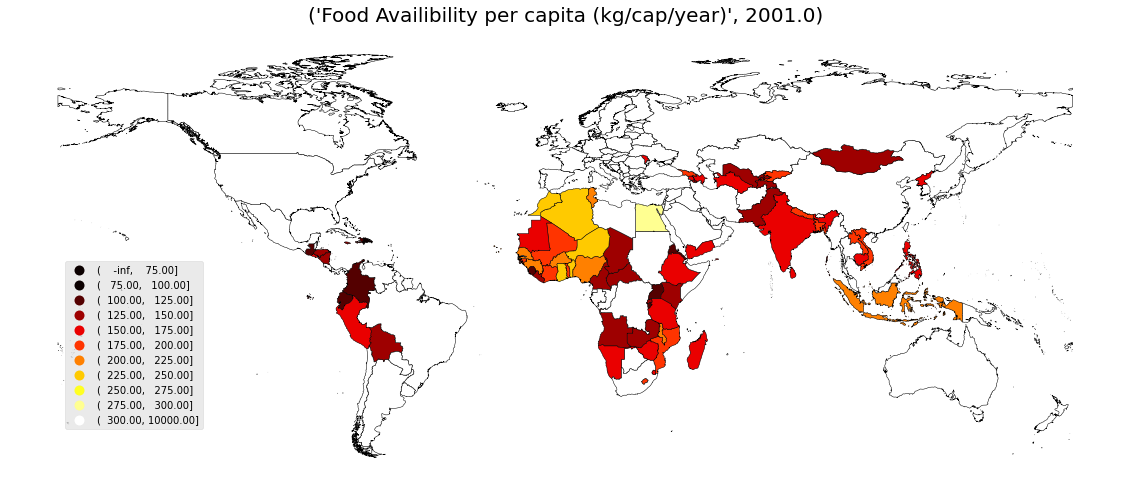

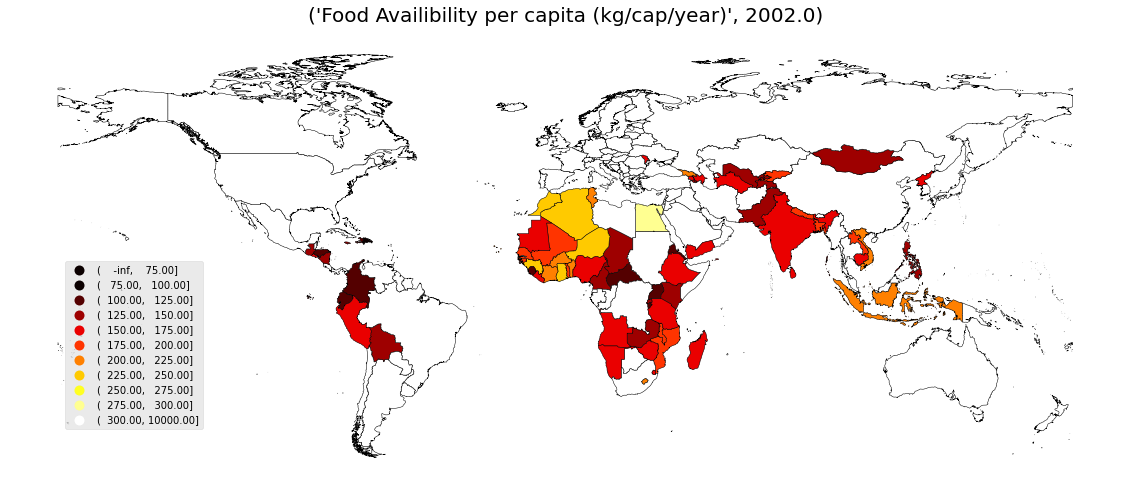

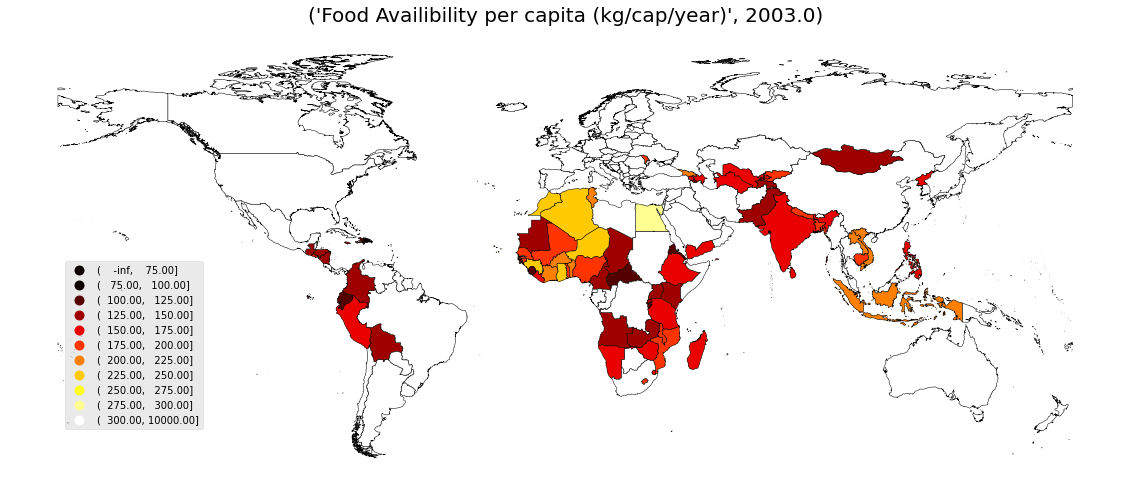

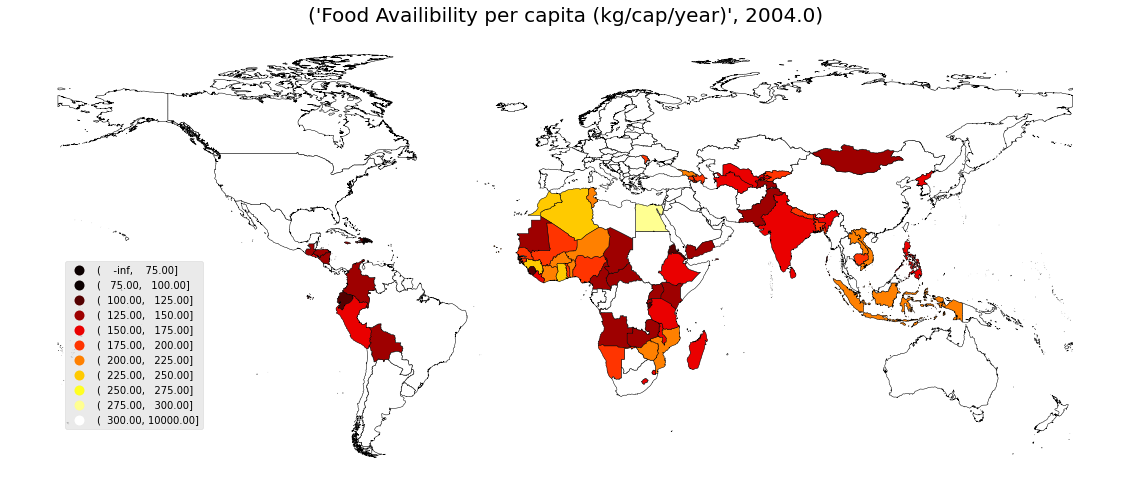

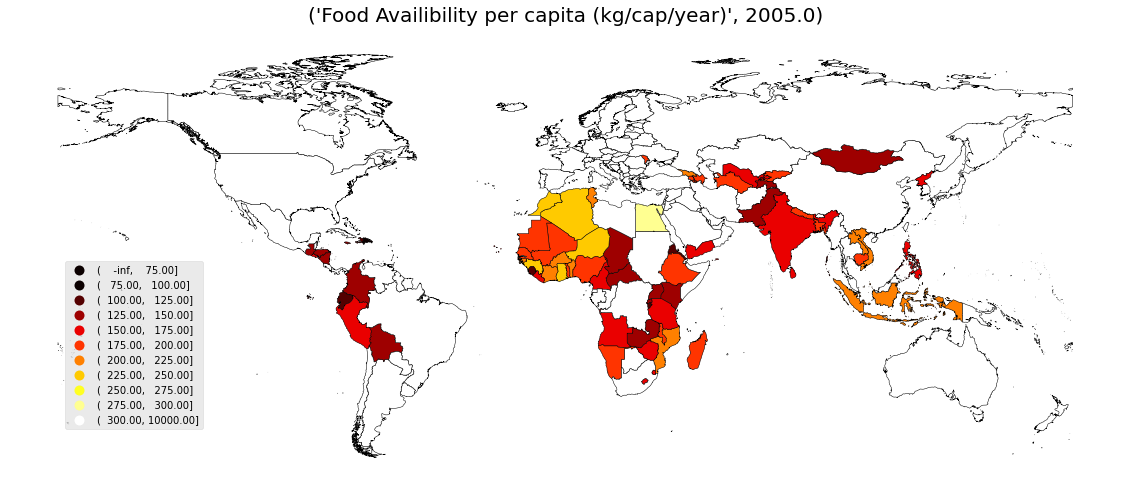

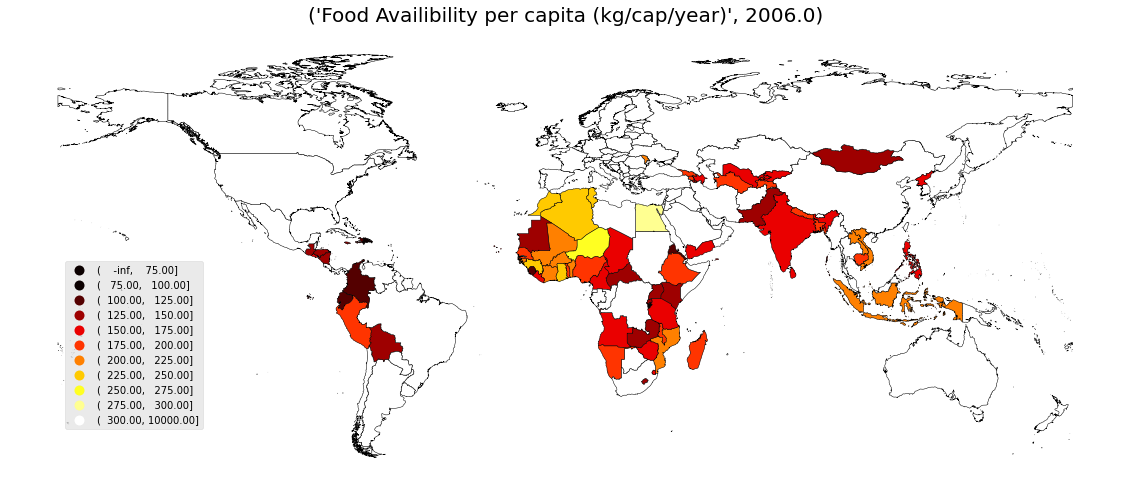

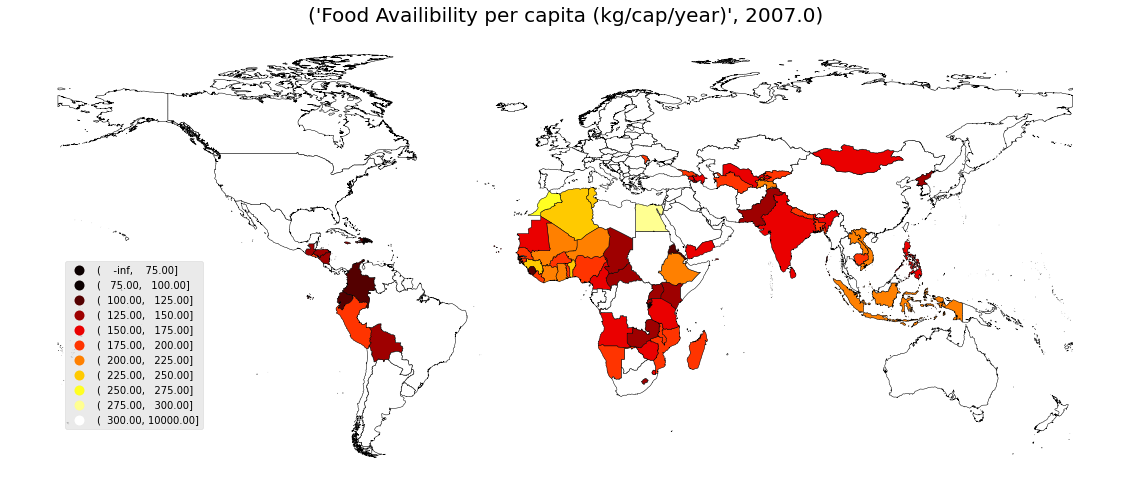

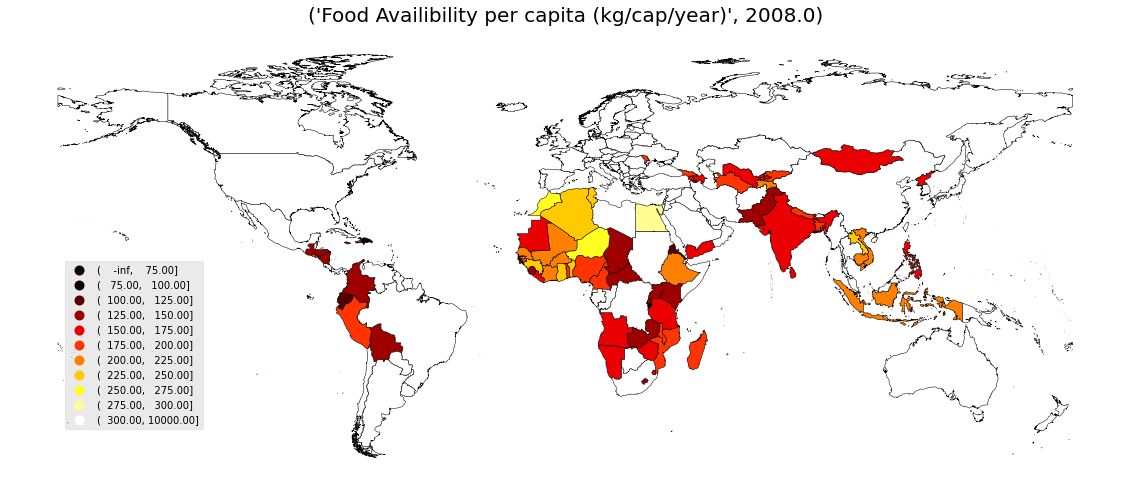

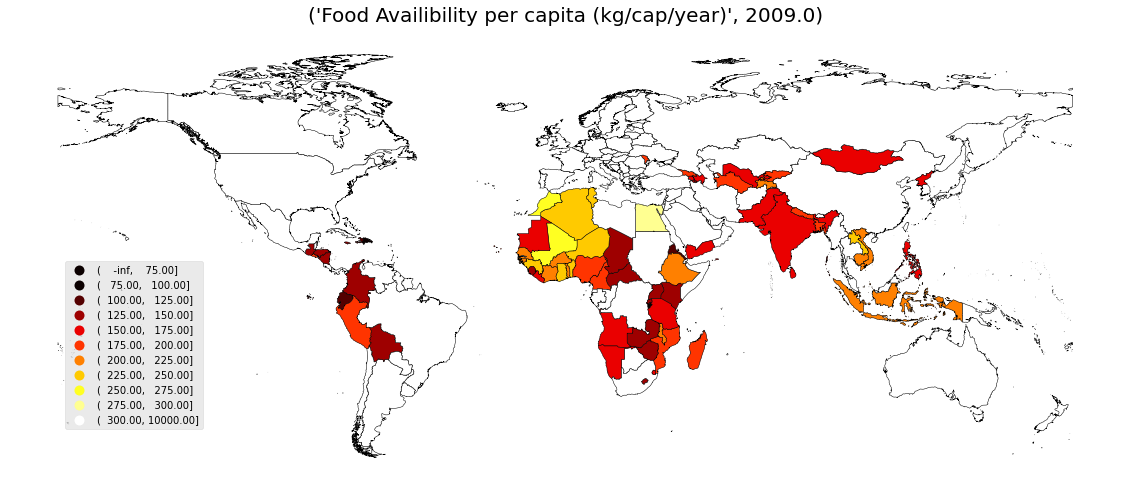

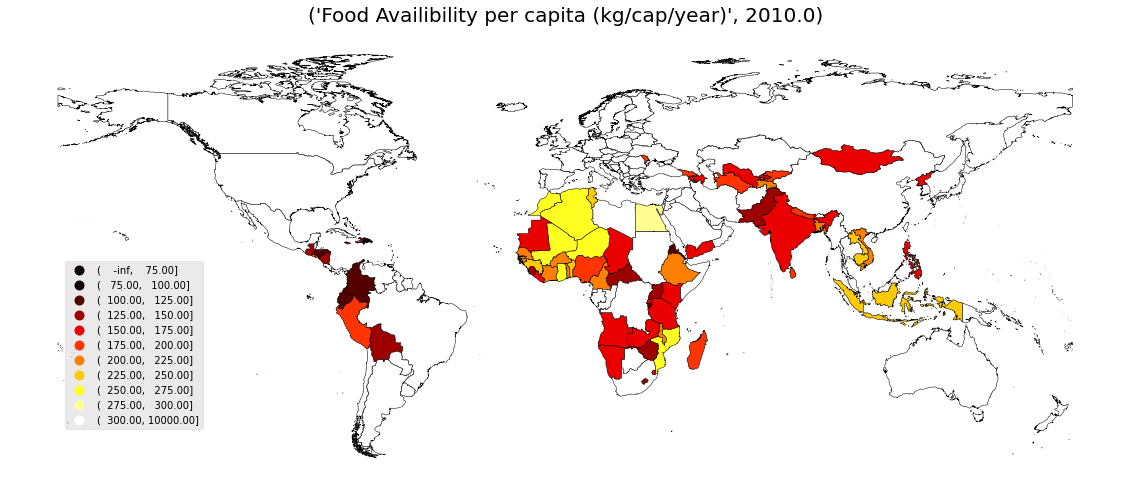

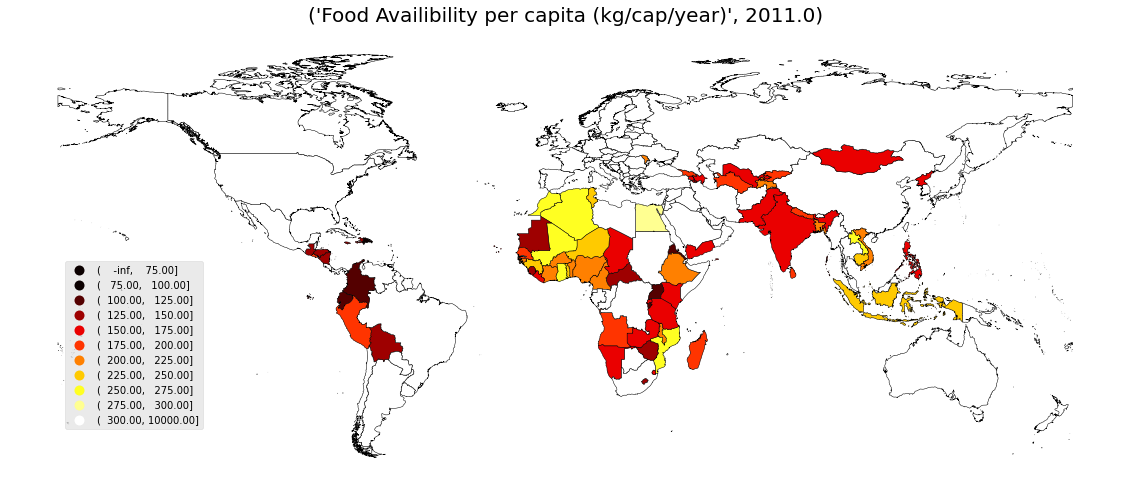

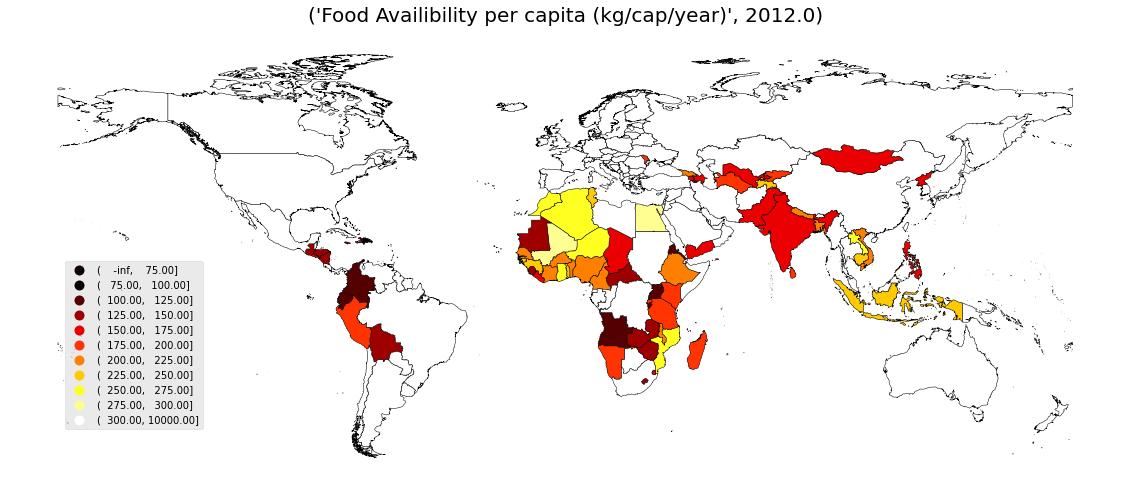

In [192]:
#Create an emply list that will be incremented with a .png file each loop:
image_list = []

#Create a for loop that:
for years in merged.columns.to_list()[3:36]:
    ax = merged.plot(column = years, cmap ='hot', figsize = (20,20), legend = True, scheme = 'user_defined', 
                     classification_kwds = {'bins':[75,100,125,150,175,200,225,250,275,300]}, edgecolor = 'black', linewidth = 0.5)

#Make a few changes to how the map looks:          
    ax.set_title(years, fontdict = {'fontsize':20}, pad = 12.5)
    ax.set_axis_off()
    ax.get_legend().set_bbox_to_anchor((0.18, 0.5))
    img = ax.get_figure()

#Let us use a buffer and that we can close at a later stage:
    variable = io.BytesIO()
    img.savefig(variable, format = 'png', bbox_inches = 'tight')
    variable.seek(0)
    image_list.append(PIL.Image.open(variable))

#Save images to GIF file
image_list[0].save('Dynamic_map.gif', format = 'GIF',
               append_images = image_list[1:],
               save_all = True, duration = 300,
               loop = 0)
variable.close()